In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
import statsmodels.api as sm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/producer-price-index/PCU311520311520P(1).csv


In [37]:
df = pd.read_csv("/kaggle/input/producer-price-index/PCU311520311520P(1).csv")
df.DATE = pd.to_datetime(df.DATE)
df = df.set_index('DATE')
df.rename(columns = {'PCU311520311520P': 'ppi'}, inplace = True)
df.count()

ppi    395
dtype: int64

In [38]:
training_data = df.loc['1983-06-01':'2014-08-01'].copy()
testing_data = df.tail(20).copy()

In [39]:
training_data.describe()

,ppi
count,375.000000
mean,149.882933
std,35.057435
min,100.000000
25%,121.600000
50%,151.500000
75%,175.300000
max,222.500000


<AxesSubplot:xlabel='DATE'>

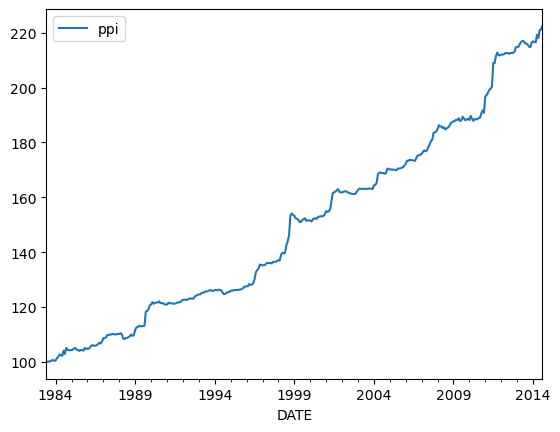

In [40]:
training_data.plot()

In [41]:
 adfuller(training_data)[1]

0.9955555519785169

<AxesSubplot:xlabel='DATE'>

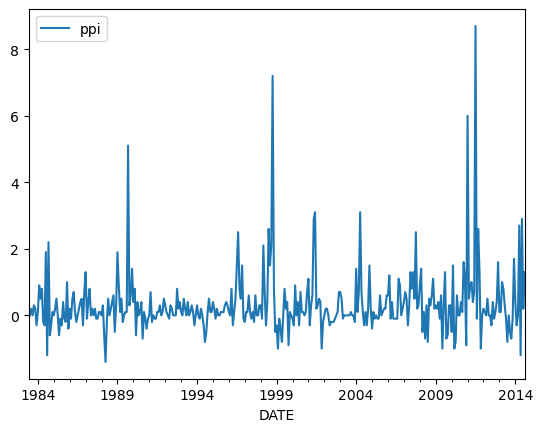

In [42]:
time_series = (training_data - (training_data).shift())
time_series.plot()

In [43]:
cleaned_ts = time_series.dropna()
adfuller(cleaned_ts)[1]

2.0464531370768565e-13

In [44]:
lagged_acf = acf(cleaned_ts, nlags = 20)
lagged_pacf = pacf(cleaned_ts, nlags = 20)

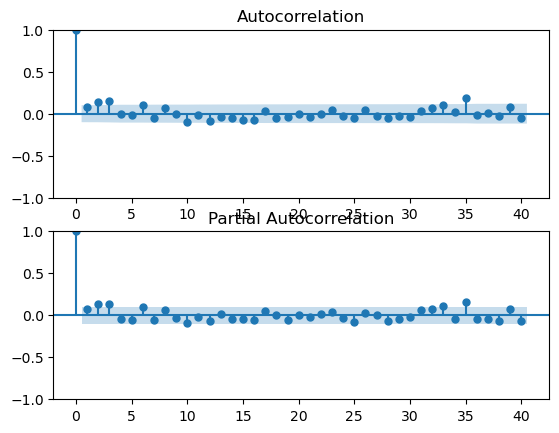

In [45]:
fig = plt.figure()
ax = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(cleaned_ts, lags = 40, ax = ax)
ax_new = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(cleaned_ts, lags = 40, method = "ywm", ax = ax_new)

In [46]:
model = ARIMA(time_series, dates = time_series.index, order = (0, 0, 3))
final_answers = model.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


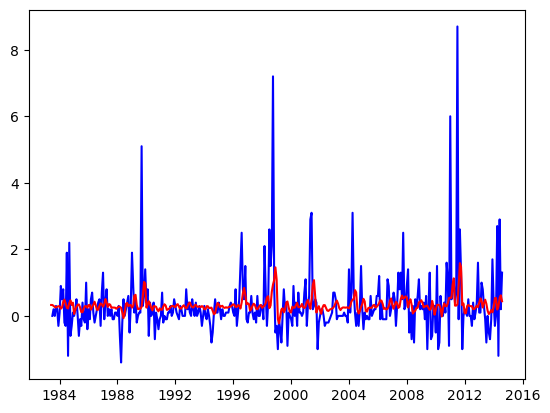

In [47]:
plt.plot(time_series, color = "b")
plt.plot(final_answers.fittedvalues, color = "r")

In [48]:
final_answers.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    ppi   No. Observations:                  375
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -504.419
Date:                Fri, 10 Mar 2023   AIC                           1018.839
Time:                        17:04:47   BIC                           1038.473
Sample:                    06-01-1983   HQIC                          1026.634
                         - 08-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3285      0.101      3.254      0.001       0.131       0.526
ma.L1          0.0594      0.045      1.332      0.183      -0.028       0.147
ma.L2          0.1507      0.046      3.262      0.001       0.060       0.241
ma.L3          0.1483      0.041      3.608      0.000       0.068       0.229
sigma2         0.8687      0.026     33.664      0.000       0.818       0.919
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11859.07
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               3.05   Skew:                             3.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
resultant = final_answers.predict(start = "1983-06-01", end = "2016-04-01", dynamic = False).to_frame()
resultant = resultant.cumsum()

Text(0, 0.5, 'Product Price Index')

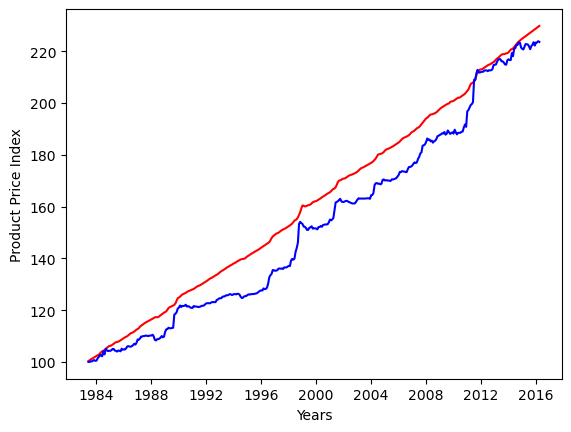

In [50]:
plt.plot(resultant, color = "r")
plt.plot(df, color = "b")
plt.xlabel("Years")
plt.ylabel("Product Price Index")

In [52]:
!pip install pmdarima
import pmdarima as pm
pm.auto_arima(time_series.dropna(), start_p = 2, start_q = 2, max_p = 5, max_q = 5, test = "adf", seasonal = True, trace = True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.5 MB/s eta 0:00:0000:01
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1022.883, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1030.101, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1029.674, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1030.168, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1069.781, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1022.324, Time=0.56 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1025.921, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1024.503, Time=0.30 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1020.772, Time=0.49 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1018.839, Time=0.31 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=1020.742, Time=0.36 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=1022.703, Time=1.02 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1038.960, Time=0.20 sec

Best model:  A

ARIMA(order=(0, 0, 3), scoring_args={}, suppress_warnings=True)

In [53]:
mae(df, resultant)

8.597824632234506